In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
from google.colab import files
import joblib

In [62]:
data = pd.read_csv('training_dataset.csv')

print(data.head())
print('--------------------------------')
print(data.isnull().sum())
print('--------------------------------')
print(data.dtypes)
print('--------------------------------')
print(data.duplicated().sum())
print('--------------------------------')

data = data.drop(['date'],axis=1)

coor = data.corr()
print(coor['price'].sort_values(ascending=False))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [67]:
features = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat']

x = data[features]
y = data['price']

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [68]:
model = Sequential([
    Input(shape=(9,)),

    Dense(units=64, activation='relu'),

    Dense(units=32, activation='relu'),

    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 427370577920.0000 - mae: 543020.4375 - val_loss: 395649712128.0000 - val_mae: 532995.6250
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 429297893376.0000 - mae: 538530.8125 - val_loss: 380025372672.0000 - val_mae: 521783.0000
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 407660494848.0000 - mae: 524044.4375 - val_loss: 343714758656.0000 - val_mae: 494613.4375
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 382333124608.0000 - mae: 497281.4375 - val_loss: 289421066240.0000 - val_mae: 450186.0000
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 285359636480.0000 - mae: 439529.8750 - val_loss: 223580209152.0000 - val_mae: 388991.6250
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 223876972544.0000 - mae: 376946.7188 - val_loss: 162063892480.0000 - val_mae: 321715.1250
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 163096805376.0000 - mae: 312763.6875 - v

In [69]:
test_mse, test_mae = model.evaluate(x_test,y_test)
print('test loss MSE', test_mse )
print('test MAE', test_mae )

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 90415513600.0000 - mae: 220460.8906
test loss MSE 87339630592.0
test MAE 214524.875


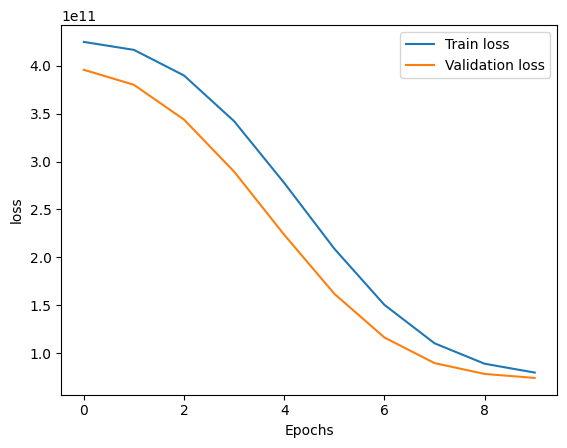

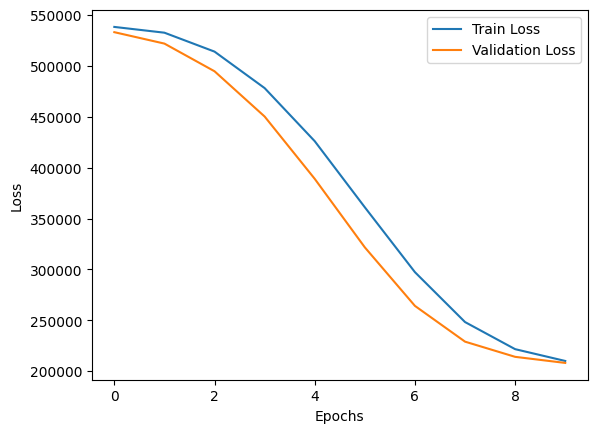

In [70]:
# Drawing training results

# رسم دقة النموذج
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['mae'], label='Train Loss')
plt.plot(history.history['val_mae'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
#Save Model & StandarScaler

model.save('model.h5')            #Save Model
joblib.dump(scaler, 'scaler.pkl') #Save StandardScaler

['scaler.pkl']

In [72]:
#Download Model & StandarScaler

files.download('model.h5')        #Download Model
files.download('scaler.pkl')      #Download StandardScaler

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>